In [13]:
import sys
sys.path.append('../')

from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *

from matplotlib import rc
import matplotlib.pylab as plt

#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def adding_dc(catalog):
    from astropy.cosmology import FlatLambdaCDM
    cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307115)
    print 'Calculate comoving distance with FlatLambdaCDM cosmology \nH0=67.77, Om0=0.307115'
    sys.stdout.flush()

    h = 0.6777
    r = cosmo.comoving_distance(catalog['Z']).value *h

    #import numpy.lib.recfuctions as rf
    from numpy.lib import recfunctions as rf
    print 'Adding Comoving distance column'
    sys.stdout.flush()
    catalog = rf.append_fields( catalog, 'DC', data = r )
    return catalog

In [15]:
def plot_z_distribution( cats = None, labels = None, zlabel = 'Z', suffix = 'test' ):
    
    import matplotlib.pyplot as plt
    z_bin, s = np.linspace(1e-5, 1.0, 200, retstep=True)
    z_center = z_bin[:-1]+s/2.
    
    fig, axes = plt.subplots( 1, 1, figsize = (8,5))
    N, _= np.histogram(cats[zlabel], bins = z_bin)
    
    #n = N/ST82Maparea

    axes.bar(z_center, N, s, color='b' )
    axes.set_xlabel('photo_z')
    axes.set_ylabel('n(z)')
    #ax.set_yscale('log')
    axes.legend(loc='best')

    axes.set_title('\nredshift histogram')
    figname ='figure/hist_z_'+suffix+'.png'
    fig.savefig(figname)
    print 'saving fig to ',figname
    
    #DAT = np.column_stack((z_center, n))
    #filename = 'data_txt/z_distribution_'+suffix+'.txt'
    #np.savetxt(filename, DAT, header = 'z, n(z)')
    #print 'saving data to ',filename

In [216]:
import numpy as np
import Corrfunc
from os.path import dirname, abspath, join as pjoin
from Corrfunc.io import read_catalog
import esutil

#mock_catalog_orig = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz'
#                                  , columns=['RA', 'DEC', 'Z'], ensure_native =True)
sampling_ind = np.random.choice(np.arange(mock_catalog_orig.size), size = 300000)
mock_catalog = mock_catalog_orig[sampling_ind]
#RA, DEC, CZ = mock_catalog['RA'], mock_catalog['DEC'], mock_catalog['DC']

#randoms_catalog_orig = esutil.io.read('/n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_South.fits.gz'
#                                    , columns=['RA', 'DEC', 'Z'], ensure_native =True)
sampling_ind = np.random.choice(np.arange(randoms_catalog_orig.size), size = 600000)
randoms_catalog = randoms_catalog_orig[sampling_ind]
#RAND_RA, RAND_DEC, RAND_CZ = randoms_catalog['RA'], randoms_catalog['DEC'], randoms_catalog['DC']


#mock_catalog_zcut = mock_catalog_orig[(mock_catalog_orig['Z'] > 0.43) & (mock_catalog_orig['Z'] < 0.7)]
#randoms_catalog_zcut = randoms_catalog_orig[(randoms_catalog_orig['Z'] > 0.43) & (randoms_catalog_orig['Z'] < 0.7)]


In [217]:
#mock_catalog_ngc_orig = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_North.fits.gz'
#                                  , columns=['RA', 'DEC', 'Z'], ensure_native =True)
sampling_ind = np.random.choice(np.arange(mock_catalog_ngc_orig.size), size = 700000)
mock_catalog_ngc = mock_catalog_ngc_orig[sampling_ind]
#mock_catalog = Cuts.SpatialCuts(mock_catalog_orig, ra=150, ra2=200, dec=20, dec2 = 40)

#randoms_catalog_ngc_orig = esutil.io.read('/n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_North.fits.gz'
#                                    , columns=['RA', 'DEC', 'Z'], ensure_native =True)
sampling_ind = np.random.choice(np.arange(randoms_catalog_ngc_orig.size), size = 1400000)
randoms_catalog_ngc = randoms_catalog_ngc_orig[sampling_ind]
#randoms_catalog = Cuts.SpatialCuts(randoms_catalog_orig, ra=150, ra2=200, dec=20, dec2 = 40)

#mock_catalog_zcut = mock_catalog_orig[(mock_catalog_orig['Z'] > 0.43) & (mock_catalog_orig['Z'] < 0.7)]
#randoms_catalog_zcut = randoms_catalog_orig[(randoms_catalog_orig['Z'] > 0.43) & (randoms_catalog_orig['Z'] < 0.7)]



print mock_catalog_orig.size, randoms_catalog_orig.size
print mock_catalog.size, randoms_catalog.size

230831 11636252
300000 600000


In [218]:
mock_catalog = np.hstack([mock_catalog, mock_catalog_ngc])
randoms_catalog = np.hstack((randoms_catalog, randoms_catalog_ngc))

In [219]:
mock_catalog = adding_dc(mock_catalog)
randoms_catalog = adding_dc(randoms_catalog)

Calculate comoving distance with FlatLambdaCDM cosmology 
H0=67.77, Om0=0.307115
Adding Comoving distance column
Calculate comoving distance with FlatLambdaCDM cosmology 
H0=67.77, Om0=0.307115
Adding Comoving distance column


In [ ]:
from systematics_module.corr import correlation_function_multipoles, _cfz_multipoles
correlation_function_multipoles(data = mock_catalog, rand = randoms_catalog, zlabel = 'Z', 
                                njack = 4, weight = None, suffix = 'random', out = None, nthreads = 30)
#_cfz_multipoles( mock_catalog_orig, randoms_catalog_orig, nthreads = 20 )

calculate correlation function multipoles 0 and 2
Ndata : 1000000  Nrand : 2000000
JK sampling
X (2000, 2)  centers (4, 2)  tol=1e-05  maxiter=200
33 iterations  cluster sizes: [409 497 605 489]
X (1000000, 2)  centers (4, 2)  tol=1e-05  maxiter=200
8 iterations  cluster sizes: [197084 243366 300000 259550]
elapsed time  209.055322


In [196]:
mock_catalog_zcut = mock_catalog[(mock_catalog['Z'] > 0.43) & (mock_catalog['Z'] < 0.7)]
randoms_catalog_zcut = randoms_catalog[(randoms_catalog['Z'] > 0.43) & (randoms_catalog['Z'] < 0.7)]


from systematics_module.corr import correlation_function_multipoles
correlation_function_multipoles(data = mock_catalog_zcut, rand = randoms_catalog_zcut, zlabel = 'Z', 
                                njack = 4, weight = None, suffix = 'random_zcut', out = None, nthreads = 30)
#_cfz_multipoles( mock_catalog_orig, randoms_catalog_orig, nthreads = 20 )

calculate correlation function multipoles 0 and 2
Ndata : 550172  Nrand : 1100740
JK sampling
X (1483, 2)  centers (4, 2)  tol=1e-05  maxiter=200
22 iterations  cluster sizes: [498 232 398 355]
X (550172, 2)  centers (4, 2)  tol=1e-05  maxiter=200
20 iterations  cluster sizes: [171159  90203 159261 129549]
elapsed time  62.489979


systematics_module/corr.py:69: RuntimeWarning: invalid value encountered in divide
  xi = (fN**2*DD_counts_smu - 2*fN* DR_counts_smu + RR_counts_smu)/(RR_counts_smu)


elapsed time  79.788723
elapsed time  64.637513
elapsed time  72.581852
elapsed time  110.016604
saving data file to :  data_txt/cfz_multipole_comparison_random_zcut.txt


0

In [1]:
from systematics_module.corr import correlation_function_multipoles, _cfz_multipoles
#correlation_function_multipoles(data = mock_catalog, rand = randoms_catalog, zlabel = 'Z', 
#                                njack = 1, weight = None, suffix = 'cmass_ngc', out = None, nthreads = 30)
rr3, multipoles3 = _cfz_multipoles( mock_catalog_orig, randoms_catalog_orig, nthreads = 30 )
#DAT = np.column_stack((rr, multipoles[:rr.size], multipoles[rr.size:]))
#np.savetxt('data_txt/cfz_comparison_cmass_sgc_test2.txt')

ImportError: No module named systematics_module.corr

In [8]:
#DAT = np.column_stack((rr3, multipoles3[:rr.size], multipoles3[:rr.size]))
#np.savetxt('data_txt/cfz_multipole_comparison_cmass_ngc_ra150_200_dec20_40.txt', DAT)
DAT = np.genfromtxt('../data_txt/cfz_multipole_comparison_random.txt')
rr_ngc, multipole_ngc, err_ngc = DAT[:,0], DAT[:,1], DAT[:,2]
DAT = np.genfromtxt('../data_txt/cfz_multipole_comparison_random_zcut.txt')
rr_ngc_zcut, multipole_ngc_zcut, err_ngc_zcut = DAT[:,0], DAT[:,1], DAT[:,2]

In [194]:
rr_ngc.size

27

In [7]:
DAT = np.genfromtxt('../data_txt/cfz_multipole_comparison_test.txt')
rr, monopole, quadrupole, err0, err2 = DAT[:,0],  DAT[:,1],  DAT[:,2],  DAT[:,3], DAT[:,4]

DAT = np.genfromtxt('../data_txt/cfz_multipole_comparison_test_zcut2.txt')
rr_zcut, monopole_zcut, quadrupole_zcut, err0_zcut, err2_zcut = DAT[:,0],  DAT[:,1],  DAT[:,2],  DAT[:,3], DAT[:,4]

In [126]:
mask.size

1584

In [5]:
DAT_measurement = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')
r_measurement = DAT_measurement[:,0]
xi_mono_measu = DAT_measurement[:,1]

DAT_measurement = np.genfromtxt('../../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_quadrupole_z43z75.dat')
r2_measurement = DAT_measurement[:,0]
xi_quad_measu = DAT_measurement[:,1]

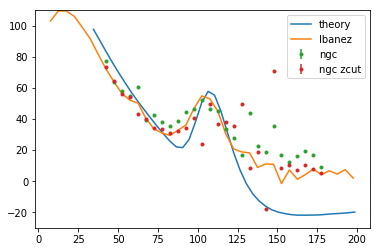

In [12]:
cmass_corr = np.genfromtxt('../data_txt/cfz_comparison_cmass_sgc_r40_180_nbin30.txt')
meanr, xi_cmass, xi_err = cmass_corr[:,0], cmass_corr[:,1],cmass_corr[:,2]
theory_corr = np.genfromtxt('../../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500:1500+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

fig, ax = plt.subplots()
#ax.plot(rbins[:-1], rbins[:-1]**2*xirppi[39,:])
#ax.errorbar(meanr, meanr**2*xi_cmass, yerr = meanr**2*xi_err, fmt='k-')
#ax.plot(scenter, scenter**2 * xi)
#ax.plot(scenter, scenter**2 * xi_monopole)
ax.plot(theory_rr[::-1], theory_rr[::-1]**2*theory_corr, label='theory')
ax.plot(r_measurement, r_measurement**2*xi_mono_measu, label='Ibanez')
#ax.errorbar(rr, rr**2*monopole, yerr = rr**2*err0, fmt='.')
#ax.errorbar(rr_zcut+2, rr_zcut**2*monopole_zcut, yerr = rr_zcut**2*err0_zcut, fmt='.')
#ax.plot(rr3, rr3**2*multipoles3[:rr3.size])
ax.errorbar(rr_ngc, rr_ngc**2*multipole_ngc[:rr_ngc.size], yerr = err_ngc, fmt ='.', label='ngc')
ax.errorbar(rr_ngc_zcut, rr_ngc_zcut**2*multipole_ngc_zcut[:rr_ngc_zcut.size], yerr = err_ngc_zcut, fmt ='.', label='ngc zcut')
ax.set_ylim(-30, 110)
ax.legend()


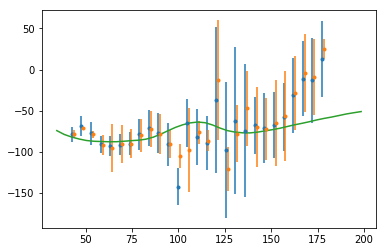

In [10]:
theory_corr = np.genfromtxt('../../../bandpower/SNR/data_txt/datav/mcmc_Ashley_xionly_b_p0.datavector')[1500+42:1500+42+42]
theory_rr = np.linspace(32, 200, 43)[:-1] + 2.5

fig, ax = plt.subplots()

ax.errorbar(rr, rr**2*quadrupole, yerr = rr**2*err2, fmt='.')
ax.errorbar(rr_zcut + 1.01, rr_zcut**2*quadrupole_zcut, yerr = rr_zcut**2*err2_zcut, fmt='.')
ax.plot(theory_rr[::-1], theory_rr[::-1]**2*theory_corr)
#ax.plot(rr3, rr3**2*multipoles3[rr3.size:])

In [1]:
from Corrfunc.utils import convert_3d_counts_to_cf
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks


N = RA.size
rand_N = RAND_RA.size

tmin = 2.5/60
tmax = 250./60
nbins = 20
print tmin, tmax

tbins = np.logspace(np.log10(tmin), np.log10(tmax), nbins + 1)


autocorr = 1
DD_counts = DDtheta_mocks(autocorr, nthreads, tbins, RA, DEC)

autocorr=0
DR_counts = DDtheta_mocks(autocorr, nthreads, tbins,
                          RA, DEC,
                          RA2=RAND_RA, DEC2=RAND_DEC)
autocorr=1
RR_counts = DDtheta_mocks(autocorr, nthreads, tbins, RAND_RA, RAND_DEC)

wtheta = convert_3d_counts_to_cf(N, N, rand_N, rand_N,
                                 DD_counts, DR_counts,
                                 DR_counts, RR_counts)


NameError: name 'RA' is not defined

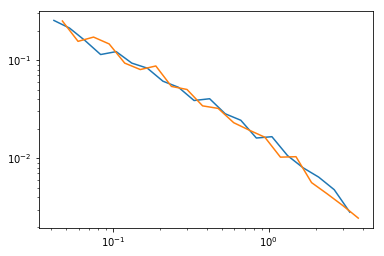

In [16]:
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_30_test.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

fig, ax = plt.subplots()
ax.loglog(tbins[:-1], wtheta)
ax.loglog(meanr, xi)

In [ ]:
from Corrfunc.utils import convert_3d_counts_to_cf
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks


# Specify that an autocorrelation is wanted

# Create the bins array
rmin = 1
rmax = 50
nbins = 10
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1)

# Specify the distance to integrate along line of sight
pimax = 40.0


cosmology = 2 #Planck


nthreads = 20

from Corrfunc.mocks.DDrppi_mocks import DDrppi_mocks
autocorr = 1
DD_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, rbins, RA, DEC, CZ
                        c_api_timer=True, is_comoving_dst=True)

autocorr=0
DR_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, rbins,
                          RA, DEC, CZ,
                          RA2=RAND_RA, DEC2=RAND_DEC, CZ2=RAND_CZ, 
                         c_api_timer=True, is_comoving_dst=True)
autocorr=1
RR_counts = DDrppi_mocks(autocorr, cosmology, nthreads, pimax, rbins, 
                         RAND_RA, RAND_DEC, RAND_CZ, c_api_timer=True, is_comoving_dst=True)



In [2]:
# sgc data
import esutil
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

cmass_sgc = esutil.io.read(path+'galaxy_DR12v5_CMASS_South_XYZ.fits.gz')
#cmass_sgc_zcut = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.7)]
random_sgc = esutil.io.read(path+'random0_DR12v5_CMASS_South_XYZ.fits.gz')
#random_sgc_zcut = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.7)]

Spatial Cut  32146
Spatial Cut  1651212
figsave : figure/spatialtest_.png
figsave : figure/spatialtest_.png


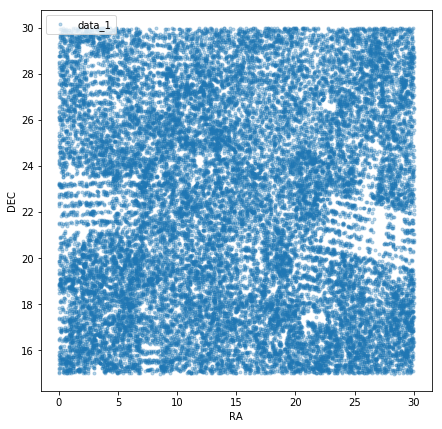

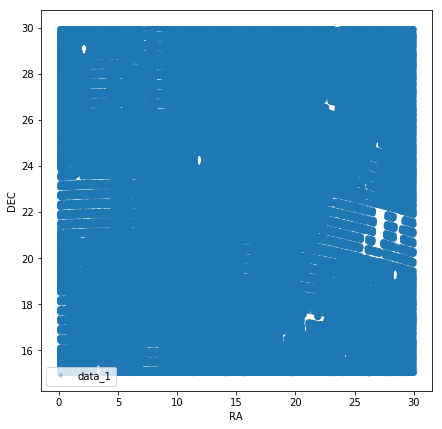

In [47]:
cmass_sgc1 = Cuts.SpatialCuts(cmass_sgc, ra=0, ra2=30, dec=15, dec2 = 30)
random_sgc1 = Cuts.SpatialCuts(random_sgc, ra=0, ra2=30, dec=15, dec2 = 30)
spatialcheck(cmass_sgc1)

In [48]:
DAT = np.column_stack((cmass_sgc1['RA'] , cmass_sgc1['DEC'] , cmass_sgc1['Z']  ))
np.savetxt(path+'galaxy_DR12v5_CMASS_South_small.txt', DAT)

DAT = np.column_stack((random_sgc1['RA'] , random_sgc1['DEC'] , random_sgc1['Z']  ))
np.savetxt(path+'random0_DR12v5_CMASS_South_small.txt', DAT)

In [23]:
DAT.size

10680639

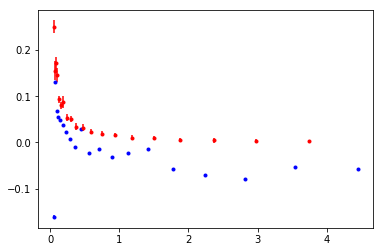

In [3]:
kdtree_corr = np.genfromtxt('/n/des/lee.5922/programs/KDTPCF/output/cmass_sgc_angular_corr')
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_30_test.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]


fig, ax =plt.subplots()
ax.errorbar(kdtree_corr[:,1], kdtree_corr[:,3], fmt='b.', yerr =kdtree_corr[:,4] )
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.r', label='dmass spt')
ax.set_xscale('linear')
#ax.set_yscale('log')

In [43]:
kdtree_corr[:,3]

array([ 0.171935  ,  0.021923  ,  0.0140336 , -0.00489532, -0.0463633 ,
       -0.0349372 , -0.0528168 , -0.0402473 ,  0.0710959 , -0.0653346 ,
       -0.0167312 ,  0.00071447,  0.00539569,  0.00435594,  0.0104254 ,
        0.0143086 , -0.0238825 , -0.0165399 , -0.00207807,  0.00107127])

In [44]:
kdtree_dd = np.genfromtxt('/n/des/lee.5922/programs/KDTPCF/output/cmass_sgc_angular_ddbins')[:,4]
kdtree_dr = np.genfromtxt('/n/des/lee.5922/programs/KDTPCF/output/cmass_sgc_angular_drbins')[:,4]
kdtree_rr = np.genfromtxt('/n/des/lee.5922/programs/KDTPCF/output/cmass_sgc_angular_rrbins')[:,4]

In [45]:
xi = (kdtree_dd - 2*kdtree_dr + kdtree_rr)/kdtree_rr

In [46]:
xi

array([ 0.17214997,  0.02265183,  0.0176709 , -0.00502423, -0.04907579,
       -0.03510297, -0.0534664 , -0.03822948,  0.07303868, -0.06555848,
       -0.01694676,  0.00045194,  0.00531988,  0.00189201,  0.0100762 ,
        0.01430032, -0.02406379, -0.01680443, -0.00296816,  0.00057813])

In [32]:
x = cmass_sgc1['CX']
y = cmass_sgc1['CX']
z = cmass_sgc1['CX']
cmass_sgc1_sample = np.vstack((x,y,z)).T

x = random_sgc1['CX']
y = random_sgc1['CX']
z = random_sgc1['CX']
random_sgc1_sample = np.vstack((x,y,z)).T

In [49]:
ra = cmass_sgc1['RA']
dec = cmass_sgc1['DEC']
z = cmass_sgc1['Z']
cmass_sgc1_sample = np.vstack((ra, dec)).T

ra = random_sgc1['RA']
dec = random_sgc1['DEC']
z = random_sgc1['Z']
random_sgc1_sample = np.vstack((ra, dec)).T

In [ ]:
theta_bins = np.logspace(np.log10(2.5/60.), np.log10(250./60), 20)
cen_theta_bins = (theta_bins[:-1]+theta_bins[1:])/2.0

from halotools.mock_observables import angular_tpcf
w_theta_with_randoms = angular_tpcf(cmass_sgc1_sample, theta_bins,
                                    randoms=random_sgc1_sample, num_threads='max')


In [36]:
from halotools.mock_observables import rp_pi_tpcf

rp_bins = np.logspace(-10,10,10)
pi_bins = np.logspace(-10,10,10)
num_threads = 10
randoms = random_sgc1_sample
estimator = 'Landy-Szalay'
xi = rp_pi_tpcf(sample1, rp_bins, pi_bins, estimator = estimator, 
                randoms = randoms, num_threads = num_threads, period=2500)

ValueError: The search algorithm used by the function you called 
does not permit you to look for pairs separated by values 
exceeding a fraction of Lbox/3. in any dimension.
Your function call would require searching for pairs separated by a distance of -9999997500.00*Lbox.
Either decrease your search length or use a larger simulation.